<a href="https://colab.research.google.com/github/njpinton/CMSC173/blob/main/03%20-%20Regularization/Ridge_and_Lasso_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Lasso and Ridge Regularization Exercises

This notebook covers **regularization methods** for linear regression: **Ridge (L2)** and **Lasso (L1)**.  
We will explore their effect on:
- Coefficient shrinkage
- Bias-variance trade-off
- Overfitting prevention


In [2]:
# 🔧 Setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# 🔹 Section 1: Ridge vs Lasso Regularization (Basic Example)

In this section, we will generate synthetic linear data with noise and apply:
- Ordinary Least Squares (no regularization)
- Ridge Regression
- Lasso Regression

We will compare the learned coefficients.


OLS Coeff: [1.435351] Intercept: 2.6927410376163823
Ridge Coeff: [1.42223299] Intercept: 2.7255360572645193
Lasso Coeff: [1.38923336] Intercept: 2.808035155263443


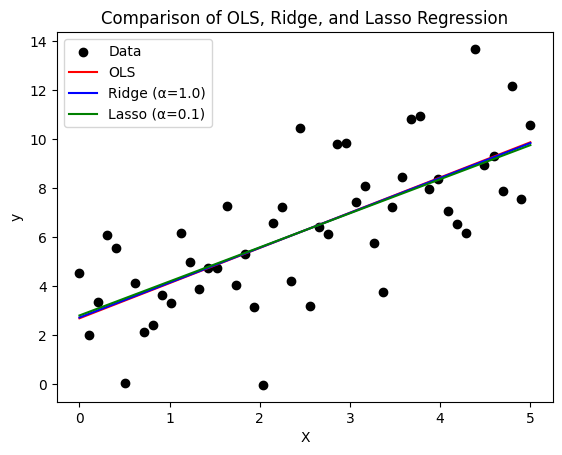

In [6]:
# Generate synthetic linear data
np.random.seed(0)
n = 50
X = np.linspace(0, 5, n).reshape(-1, 1)
y = 2 * X[:, 0] + 1 + np.random.randn(n) * 2

# Fit models
ols = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=0.1).fit(X, y)

print("OLS Coeff:", ols.coef_, "Intercept:", ols.intercept_)
print("Ridge Coeff:", ridge.coef_, "Intercept:", ridge.intercept_)
print("Lasso Coeff:", lasso.coef_, "Intercept:", lasso.intercept_)

# --- Plot results ---
X_plot = np.linspace(0, 5, 200).reshape(-1, 1)

plt.scatter(X, y, color="black", label="Data")
plt.plot(X_plot, ols.predict(X_plot), "r-", label="OLS")
plt.plot(X_plot, ridge.predict(X_plot), "b-", label="Ridge (α=1.0)")
plt.plot(X_plot, lasso.predict(X_plot), "g-", label="Lasso (α=0.1)")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of OLS, Ridge, and Lasso Regression")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+00, tolerance: 3.667e-03
  model = cd_fast.enet_coordinate_descent(


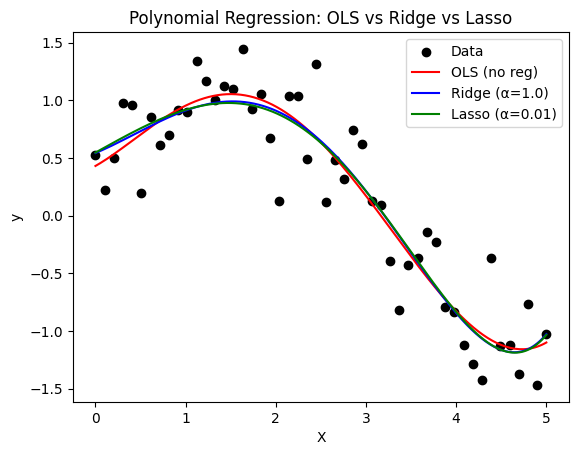

In [7]:
# Generate synthetic nonlinear data
np.random.seed(0)
n = 50
X = np.linspace(0, 5, n).reshape(-1, 1)
y_true = np.sin(X).ravel()
y = y_true + np.random.randn(n) * 0.3   # add noise

# Polynomial degree
degree = 5

# Create polynomial features
poly = PolynomialFeatures(degree)

# Fit models
ols = make_pipeline(poly, LinearRegression()).fit(X, y)
ridge = make_pipeline(poly, Ridge(alpha=1.0)).fit(X, y)
lasso = make_pipeline(poly, Lasso(alpha=0.01, max_iter=10000)).fit(X, y)

# Plot results
X_plot = np.linspace(0, 5, 200).reshape(-1, 1)

plt.scatter(X, y, color="black", label="Data")
plt.plot(X_plot, ols.predict(X_plot), "r-", label="OLS (no reg)")
plt.plot(X_plot, ridge.predict(X_plot), "b-", label="Ridge (α=1.0)")
plt.plot(X_plot, lasso.predict(X_plot), "g-", label="Lasso (α=0.01)")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression: OLS vs Ridge vs Lasso")
plt.legend()
plt.show()


# 🔹 Section 2: Effect of Regularization Strength

Here, we vary the **Ridge penalty α** and observe its effect on coefficient shrinkage.


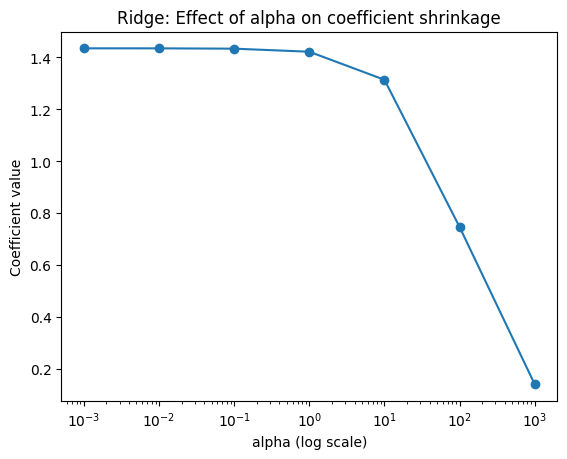

In [4]:
alphas = np.logspace(-3, 3, 7)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X, y)
    coefs.append(ridge.coef_[0])

plt.semilogx(alphas, coefs, marker="o")
plt.xlabel("alpha (log scale)")
plt.ylabel("Coefficient value")
plt.title("Ridge: Effect of alpha on coefficient shrinkage")
plt.show()


# 🔹 Section 3: High-Degree Polynomial Growth (10th Degree)

We now generate **10-degree polynomial growth data** with noise.  

- **OLS (no regularization)** will severely overfit.  
- **Ridge regularization** stabilizes the fit and controls coefficient explosion.  


w/o regularization (λ = 0)
y = -20.555 +896.670·x -21553.678·x^2 +251308.898·x^3 -1544933.757·x^4 +5510272.821·x^5 -12024133.042·x^6 +16302236.824·x^7 -13401988.258·x^8 +6117807.083·x^9 -1189844.787·x^10
R^2 = 0.648987

with regularization (λ = 0.1)
y = -6.454 +29.948·x +3.732·x^2 +0.570·x^3 +0.532·x^4 +0.760·x^5 +1.194·x^6 +1.946·x^7 +3.016·x^8 +4.342·x^9 +5.847·x^10
R^2 = 0.612200


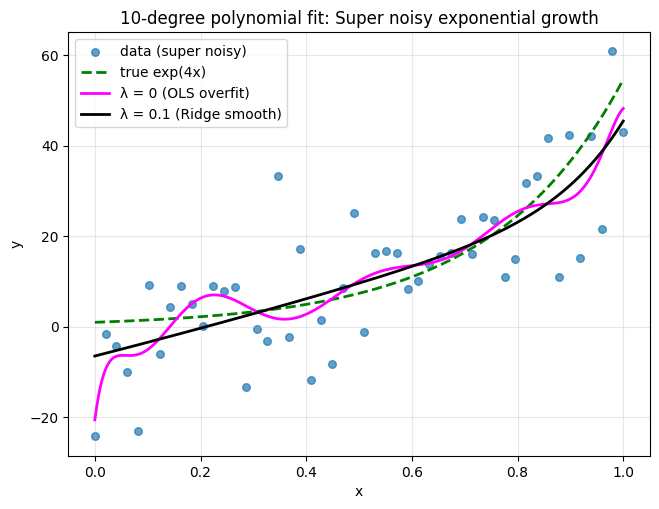

In [23]:
# OLS (λ=0) vs Ridge (λ=0.1) with 10th-degree polynomial fit

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

rng = np.random.default_rng(2025)

# -----------------------------
# 1) Exponential "growth" data
# -----------------------------
n = 50
x = np.linspace(0, 1, n)

# True exponential growth curve
true_y = np.exp(4 * x)

# Add *heavy* noise (big variance)
noise_level = 10.
y = true_y + rng.normal(0, noise_level, size=n)

# Add downward edge dips to exaggerate OLS wiggles
y[0:2]  -= 3.0
y[-2:]  -= 3.0

# Vandermonde for degree 10
X = np.vander(x, N=11, increasing=True)

# -----------------------------
# 2) OLS (λ = 0)
# -----------------------------
beta_ols, *_ = lstsq(X, y, rcond=None)
yhat_ols = X @ beta_ols
ss_res_ols = np.sum((y - yhat_ols)**2)
ss_tot = np.sum((y - y.mean())**2)
r2_ols = 1 - ss_res_ols/ss_tot

# -----------------------------
# 3) Ridge (λ = 0.1)
# -----------------------------
lam = 0.1
I = np.eye(X.shape[1]); I[0,0] = 0  # don't regularize intercept
beta_ridge = np.linalg.solve(X.T @ X + lam * I, X.T @ y)
yhat_ridge = X @ beta_ridge
ss_res_ridge = np.sum((y - yhat_ridge)**2)
r2_ridge = 1 - ss_res_ridge/ss_tot

# -----------------------------
# 4) Print equations
# -----------------------------
def poly_to_string(beta, precision=3):
    terms = []
    for k, b in enumerate(beta):
        if k == 0: terms.append(f"{b:.{precision}f}")
        elif k == 1: terms.append(f"{b:+.{precision}f}·x")
        else:        terms.append(f"{b:+.{precision}f}·x^{k}")
    return "y = " + " ".join(terms)

print("w/o regularization (λ = 0)")
print(poly_to_string(beta_ols, 3))
print(f"R^2 = {r2_ols:.6f}\n")

print("with regularization (λ = 0.1)")
print(poly_to_string(beta_ridge, 3))
print(f"R^2 = {r2_ridge:.6f}")

# -----------------------------
# 5) Plot
# -----------------------------
xx = np.linspace(0, 1, 600)
XX = np.vander(xx, N=11, increasing=True)
yy_ols = XX @ beta_ols
yy_ridge = XX @ beta_ridge
yy_true = np.exp(4 * xx)

plt.figure(figsize=(7.5, 5.5))
plt.scatter(x, y, label="data (super noisy)", s=30, alpha=0.7)
plt.plot(xx, yy_true, "g--", label="true exp(4x)", linewidth=2)
plt.plot(xx, yy_ols, label="λ = 0 (OLS overfit)", linewidth=2, color="magenta")
plt.plot(xx, yy_ridge, label="λ = 0.1 (Ridge smooth)", linewidth=2, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("10-degree polynomial fit: Super noisy exponential growth")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# 🔹 Section 4: Lasso Feature Selection

Lasso tends to **eliminate irrelevant features** by shrinking some coefficients exactly to zero.  
We demonstrate this on high-dimensional synthetic data.


# 📌 Lasso Regression Example (Short Explanation)

### 1. Data Setup
- 50 samples, 20 features.  
- Only the first 5 features truly matter: **sparse regression problem**.  
- Target:  
  $$
  y = X\beta + \varepsilon
  $$

### 2. Lasso Regression
- **Lasso** = Linear Regression + **L1 penalty**.  
- Encourages some coefficients to shrink to **zero** → acts as **feature selection**.  

$$
\min_{\beta} \; \sum (y - X\beta)^2 + \alpha \sum |\beta_j|
$$

### 3. Results
- Lasso recovers the important coefficients.  
- Irrelevant features shrink to ~0.  
- Prints model equation and **R² score**.  

### 4. Visuals
- **Bar plot**: True vs Estimated coefficients.  
- **Scatter plot**: Predicted vs Actual \(y\).  
- Shows that Lasso gives a good fit while simplifying the model.


True coefficients: [ 5. -3.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
Lasso estimated coefficients: [ 4.791 -3.1    1.81   0.     0.82  -0.    -0.     0.     0.    -0.
  0.    -0.     0.055  0.    -0.    -0.     0.     0.    -0.     0.   ]
Intercept: -0.077
R^2: 0.9933   MSE: 0.2971

Model equation:
ŷ = -0.077 + 4.791·x1 - 3.100·x2 + 1.810·x3 + 0.820·x5 + 0.055·x13


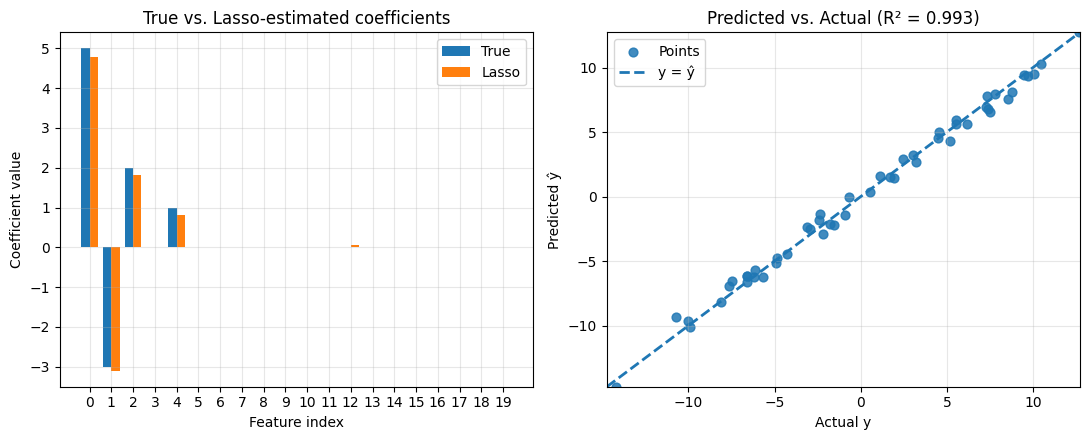

In [24]:
# Colab-ready: Lasso on high-dimensional data with visuals + equation + R^2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# 1) Data
# -----------------------------
np.random.seed(1)
n, p = 50, 20
X = np.random.randn(n, p)
true_coef = np.zeros(p)
true_coef[:5] = [5, -3, 2, 0, 1]  # only first 5 features matter
y = X @ true_coef + np.random.randn(n) * 0.5

# -----------------------------
# 2) Fit Lasso
# -----------------------------
lasso = Lasso(alpha=0.1, fit_intercept=True, max_iter=10000, random_state=1)
lasso.fit(X, y)
y_pred = lasso.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("True coefficients:", true_coef)
print("Lasso estimated coefficients:", np.round(lasso.coef_, 3))
print(f"Intercept: {lasso.intercept_:.3f}")
print(f"R^2: {r2:.4f}   MSE: {mse:.4f}")

# -----------------------------
# 3) Pretty-print equation
# -----------------------------
def lasso_equation(intercept, coef, thresh=1e-6, precision=3):
    terms = [f"{intercept:.{precision}f}"]
    for j, b in enumerate(coef):
        if abs(b) > thresh:
            sign = " + " if b >= 0 else " - "
            terms.append(f"{sign}{abs(b):.{precision}f}·x{j+1}")
    return "ŷ = " + "".join(terms)

print("\nModel equation:")
print(lasso_equation(lasso.intercept_, lasso.coef_, precision=3))

# -----------------------------
# 4) Plots
# -----------------------------
fig = plt.figure(figsize=(11, 4.5))

# (a) True vs Estimated coefficients
ax1 = plt.subplot(1, 2, 1)
idx = np.arange(p)
width = 0.38
ax1.bar(idx - width/2, true_coef, width=width, label="True")
ax1.bar(idx + width/2, lasso.coef_, width=width, label="Lasso")
ax1.set_xlabel("Feature index")
ax1.set_ylabel("Coefficient value")
ax1.set_title("True vs. Lasso-estimated coefficients")
ax1.set_xticks(idx)
ax1.grid(True, alpha=0.3)
ax1.legend()

# (b) Predicted vs Actual
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(y, y_pred, s=40, alpha=0.85, label="Points")
# 45-degree guide line
lims = [min(y.min(), y_pred.min()), max(y.max(), y_pred.max())]
ax2.plot(lims, lims, linestyle="--", linewidth=2, label="y = ŷ")
ax2.set_xlim(lims)
ax2.set_ylim(lims)
ax2.set_xlabel("Actual y")
ax2.set_ylabel("Predicted ŷ")
ax2.set_title(f"Predicted vs. Actual (R² = {r2:.3f})")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


# 📌 Ridge Regression Example (Short Explanation)

### 1. Data Setup
- Same dataset: 50 samples, 20 features, only first 5 matter.  
- Target:  
  $$
  y = X\beta + \varepsilon
  $$

### 2. Ridge Regression
- **Ridge** = Linear Regression + **L2 penalty**.  
- Shrinks coefficients but **does not force them to zero**.  
- Helps prevent overfitting, especially when features are correlated.  

$$
\min_{\beta} \; \sum (y - X\beta)^2 + \alpha \sum \beta_j^2
$$

### 3. Results
- All coefficients are **shrunk toward zero**.  
- Irrelevant ones get small, but usually not exactly zero.  
- Prints model equation and **R² score**.  

### 4. Visuals
- **Bar plot**: True vs Estimated coefficients.  
- **Scatter plot**: Predicted vs Actual \(y\).  
- Shows Ridge keeps *all* features but controls their size.


True coefficients: [ 5. -3.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
Ridge estimated coefficients: [ 4.829e+00 -3.097e+00  1.987e+00  1.900e-02  9.590e-01 -4.000e-03
 -2.500e-02  1.050e-01 -1.030e-01 -1.230e-01  1.530e-01 -7.700e-02
  1.560e-01 -1.080e-01 -7.400e-02 -2.900e-02  6.000e-02  1.040e-01
 -8.200e-02 -4.300e-02]
Intercept: -0.079
R^2: 0.9956   MSE: 0.1962

Model equation:
ŷ = -0.079 + 4.829·x1 - 3.097·x2 + 1.987·x3 + 0.019·x4 + 0.959·x5 - 0.004·x6 - 0.025·x7 + 0.105·x8 - 0.103·x9 - 0.123·x10 + 0.153·x11 - 0.077·x12 + 0.156·x13 - 0.108·x14 - 0.074·x15 - 0.029·x16 + 0.060·x17 + 0.104·x18 - 0.082·x19 - 0.043·x20


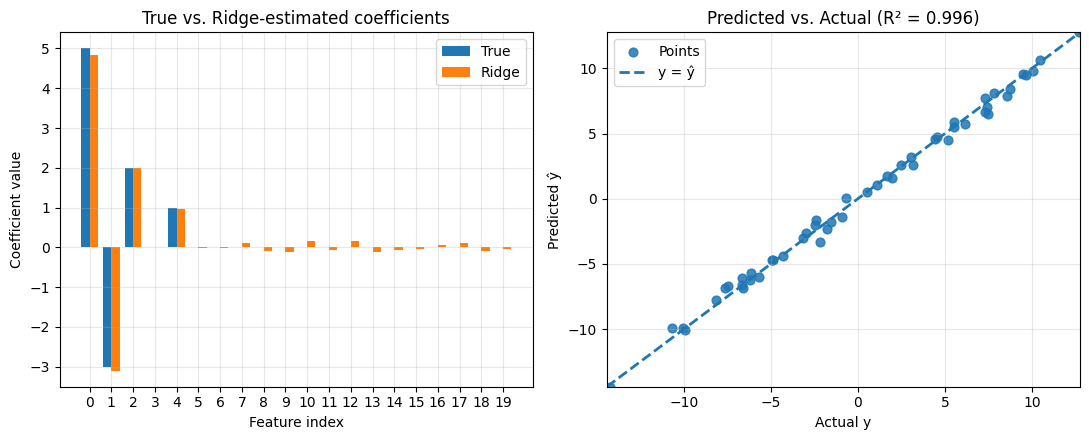

In [25]:
# Colab-ready: Ridge on high-dimensional data with visuals + equation + R^2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# 1) Data (same as before)
# -----------------------------
np.random.seed(1)
n, p = 50, 20
X = np.random.randn(n, p)
true_coef = np.zeros(p)
true_coef[:5] = [5, -3, 2, 0, 1]  # only first 5 features matter
y = X @ true_coef + np.random.randn(n) * 0.5

# -----------------------------
# 2) Fit Ridge
# -----------------------------
ridge = Ridge(alpha=1.0, fit_intercept=True, random_state=1)
ridge.fit(X, y)
y_pred = ridge.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("True coefficients:", true_coef)
print("Ridge estimated coefficients:", np.round(ridge.coef_, 3))
print(f"Intercept: {ridge.intercept_:.3f}")
print(f"R^2: {r2:.4f}   MSE: {mse:.4f}")

# -----------------------------
# 3) Pretty-print equation
# -----------------------------
def ridge_equation(intercept, coef, precision=3):
    terms = [f"{intercept:.{precision}f}"]
    for j, b in enumerate(coef):
        if abs(b) > 1e-6:  # keep all terms (Ridge doesn't zero out)
            sign = " + " if b >= 0 else " - "
            terms.append(f"{sign}{abs(b):.{precision}f}·x{j+1}")
    return "ŷ = " + "".join(terms)

print("\nModel equation:")
print(ridge_equation(ridge.intercept_, ridge.coef_, precision=3))

# -----------------------------
# 4) Plots
# -----------------------------
fig = plt.figure(figsize=(11, 4.5))

# (a) True vs Estimated coefficients
ax1 = plt.subplot(1, 2, 1)
idx = np.arange(p)
width = 0.38
ax1.bar(idx - width/2, true_coef, width=width, label="True")
ax1.bar(idx + width/2, ridge.coef_, width=width, label="Ridge")
ax1.set_xlabel("Feature index")
ax1.set_ylabel("Coefficient value")
ax1.set_title("True vs. Ridge-estimated coefficients")
ax1.set_xticks(idx)
ax1.grid(True, alpha=0.3)
ax1.legend()

# (b) Predicted vs Actual
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(y, y_pred, s=40, alpha=0.85, label="Points")
lims = [min(y.min(), y_pred.min()), max(y.max(), y_pred.max())]
ax2.plot(lims, lims, linestyle="--", linewidth=2, label="y = ŷ")
ax2.set_xlim(lims)
ax2.set_ylim(lims)
ax2.set_xlabel("Actual y")
ax2.set_ylabel("Predicted ŷ")
ax2.set_title(f"Predicted vs. Actual (R² = {r2:.3f})")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


# 📚 Lasso vs Ridge (Side-by-Side)

## Setup
- Synthetic regression: 50 samples, 20 features; only first 5 truly matter.
- Target: \( y = X\beta + \varepsilon \) with small Gaussian noise (sparse ground truth).

## Lasso
- Linear regression + **L1 penalty**.
- Drives some coefficients **exactly to zero** → **feature selection**.

\[
\min_{\beta} \sum (y - X\beta)^2 + \alpha \sum |\beta_j|
\]

## Ridge
- Linear regression + **L2 penalty**.
- **Shrinks** all coefficients toward zero (usually not exactly zero) → controls variance, handles collinearity.

\[
\min_{\beta} \sum (y - X\beta)^2 + \alpha \sum \beta_j^2
\]

## What you’ll see
- **Bar charts**: True vs Estimated coefficients (Lasso and Ridge).
- **Pred vs Actual scatter** with 45° line and **R²** in titles.
- Printed **equations** for both models (terms shown clearly).


=== LASSO (alpha=0.1) ===
True coefficients:  [ 5. -3.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
Estimated coef:     [ 4.791 -3.1    1.81   0.     0.82  -0.    -0.     0.     0.    -0.
  0.    -0.     0.055  0.    -0.    -0.     0.     0.    -0.     0.   ]
Intercept: -0.077
R^2: 0.9933   MSE: 0.2971
Equation (non-zero terms):
ŷ = -0.077 + 4.791·x1 - 3.100·x2 + 1.810·x3 + 0.820·x5 + 0.055·x13

=== RIDGE (alpha=1.0) ===
True coefficients:  [ 5. -3.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
Estimated coef:     [ 4.829e+00 -3.097e+00  1.987e+00  1.900e-02  9.590e-01 -4.000e-03
 -2.500e-02  1.050e-01 -1.030e-01 -1.230e-01  1.530e-01 -7.700e-02
  1.560e-01 -1.080e-01 -7.400e-02 -2.900e-02  6.000e-02  1.040e-01
 -8.200e-02 -4.300e-02]
Intercept: -0.079
R^2: 0.9956   MSE: 0.1962
Equation (all terms shown):
ŷ = -0.079 + 4.829·x1 - 3.097·x2 + 1.987·x3 + 0.019·x4 + 0.959·x5 - 0.004·x6 - 0.025·x7 + 0.105·x8 - 0.103·x9 - 0.123·x10 + 

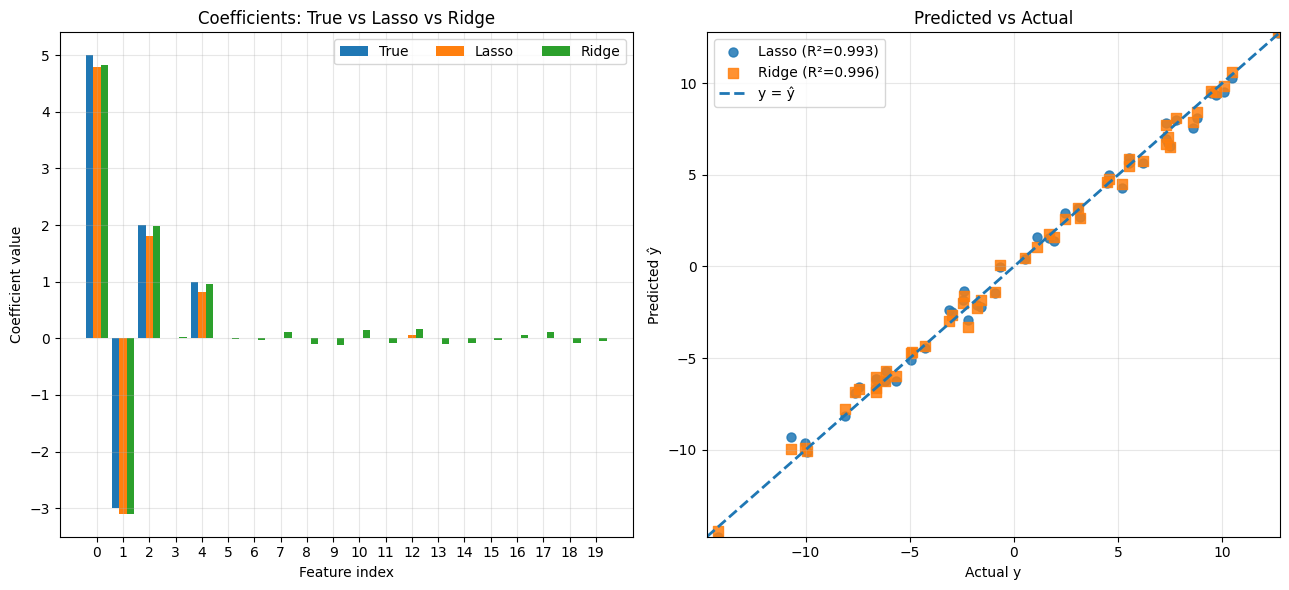


Takeaway:
- Lasso (L1) zeroes out many coefficients → feature selection + interpretability.
- Ridge (L2) keeps all features but shrinks them → stability with correlated features.


In [26]:
# Colab-ready: Lasso & Ridge side-by-side (data once, compare fits, plots, equations, R^2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# 1) Data
# -----------------------------
np.random.seed(1)
n, p = 50, 20
X = np.random.randn(n, p)
true_coef = np.zeros(p)
true_coef[:5] = [5, -3, 2, 0, 1]  # only first 5 features matter
y = X @ true_coef + np.random.randn(n) * 0.5

# -----------------------------
# 2) Fit models
# -----------------------------
lasso = Lasso(alpha=0.1, fit_intercept=True, max_iter=10000, random_state=1).fit(X, y)
ridge = Ridge(alpha=1.0, fit_intercept=True, random_state=1).fit(X, y)

yhat_lasso = lasso.predict(X)
yhat_ridge = ridge.predict(X)

r2_lasso  = r2_score(y, yhat_lasso)
r2_ridge  = r2_score(y, yhat_ridge)
mse_lasso = mean_squared_error(y, yhat_lasso)
mse_ridge = mean_squared_error(y, yhat_ridge)

# -----------------------------
# 3) Pretty equations
# -----------------------------
def equation(intercept, coef, *, precision=3, zero_thresh=1e-8, force_show_all=False):
    terms = [f"{intercept:.{precision}f}"]
    for j, b in enumerate(coef):
        if force_show_all or abs(b) > zero_thresh:
            sign = " + " if b >= 0 else " - "
            terms.append(f"{sign}{abs(b):.{precision}f}·x{j+1}")
    return "ŷ = " + "".join(terms)

print("=== LASSO (alpha=0.1) ===")
print("True coefficients: ", np.round(true_coef, 3))
print("Estimated coef:    ", np.round(lasso.coef_, 3))
print(f"Intercept: {lasso.intercept_:.3f}")
print(f"R^2: {r2_lasso:.4f}   MSE: {mse_lasso:.4f}")
print("Equation (non-zero terms):")
print(equation(lasso.intercept_, lasso.coef_, precision=3, zero_thresh=1e-6, force_show_all=False))
print()

print("=== RIDGE (alpha=1.0) ===")
print("True coefficients: ", np.round(true_coef, 3))
print("Estimated coef:    ", np.round(ridge.coef_, 3))
print(f"Intercept: {ridge.intercept_:.3f}")
print(f"R^2: {r2_ridge:.4f}   MSE: {mse_ridge:.4f}")
print("Equation (all terms shown):")
print(equation(ridge.intercept_, ridge.coef_, precision=3, force_show_all=True))

# -----------------------------
# 4) Visual comparison
# -----------------------------
fig = plt.figure(figsize=(13, 6))

# (A) Coefficients: True vs Lasso vs Ridge
ax1 = plt.subplot(1, 2, 1)
idx = np.arange(p)
width = 0.28
ax1.bar(idx - width, true_coef, width=width, label="True")
ax1.bar(idx, lasso.coef_, width=width, label="Lasso")
ax1.bar(idx + width, ridge.coef_, width=width, label="Ridge")
ax1.set_xlabel("Feature index")
ax1.set_ylabel("Coefficient value")
ax1.set_title("Coefficients: True vs Lasso vs Ridge")
ax1.set_xticks(idx)
ax1.grid(True, alpha=0.3)
ax1.legend(ncols=3)

# (B) Predicted vs Actual for both models
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(y, yhat_lasso, s=42, alpha=0.85, label=f"Lasso (R²={r2_lasso:.3f})")
ax2.scatter(y, yhat_ridge, s=42, alpha=0.85, marker="s", label=f"Ridge (R²={r2_ridge:.3f})")
lims = [min(y.min(), yhat_lasso.min(), yhat_ridge.min()),
        max(y.max(), yhat_lasso.max(), yhat_ridge.max())]
ax2.plot(lims, lims, linestyle="--", linewidth=2, label="y = ŷ")
ax2.set_xlim(lims)
ax2.set_ylim(lims)
ax2.set_xlabel("Actual y")
ax2.set_ylabel("Predicted ŷ")
ax2.set_title("Predicted vs Actual")
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# 5) Quick takeaway (printed)
# -----------------------------
print("\nTakeaway:")
print("- Lasso (L1) zeroes out many coefficients → feature selection + interpretability.")
print("- Ridge (L2) keeps all features but shrinks them → stability with correlated features.")


# 🧑‍💻 Activity: Lasso vs Ridge Challenge

### Task
Write Python code that:

1. **Data Generation**
   - Create a synthetic regression dataset with:
     - 100 samples, 30 features.
     - Only the first 8 features are truly important.
     - Add Gaussian noise (std = 1.0).

2. **Model Training**
   - Fit both **Lasso** and **Ridge** regressions on the dataset.
   - Use a range of `alpha` values (e.g. [0.01, 0.1, 1, 10]).

3. **Evaluation**
   - For each model and alpha:
     - Print the **R² score**.
     - Print the **number of non-zero coefficients**.
   - Identify which model:
     - Selects the true features better.
     - Achieves the highest R².

4. **Visualization**
   - Plot side-by-side bar charts of the coefficients:
     - True coefficients.
     - Best Lasso coefficients.
     - Best Ridge coefficients.
   - Plot Predicted vs Actual values for both best models.

### Rules
- Do **not** use helper functions like `sklearn.datasets.make_regression`.  
  Instead, generate data manually with NumPy.  
- You must write all code yourself — no copy-paste from previous cells.  
- Output should clearly show:
  - Which model is better at **feature selection** (Lasso vs Ridge).
  - Which model has better **predictive performance**.

### Hint
Think about:
- `np.random.randn` for data.
- `Lasso`, `Ridge` from `sklearn.linear_model`.
- Loops over alpha values.
